In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

GERMANY

In [2]:
data_de = pd.read_csv('ESS_R8_Germany.csv')

In [6]:
sub_data = data_de.iloc[:,15:20]

In [7]:
sub_data.head()

,trstlgl,trstplt,trstprt,trstprl,vote
0,4,1,1,3,1
1,8,7,7,8,1
2,9,7,3,5,1
3,9,7,7,8,1
4,4,1,3,5,1


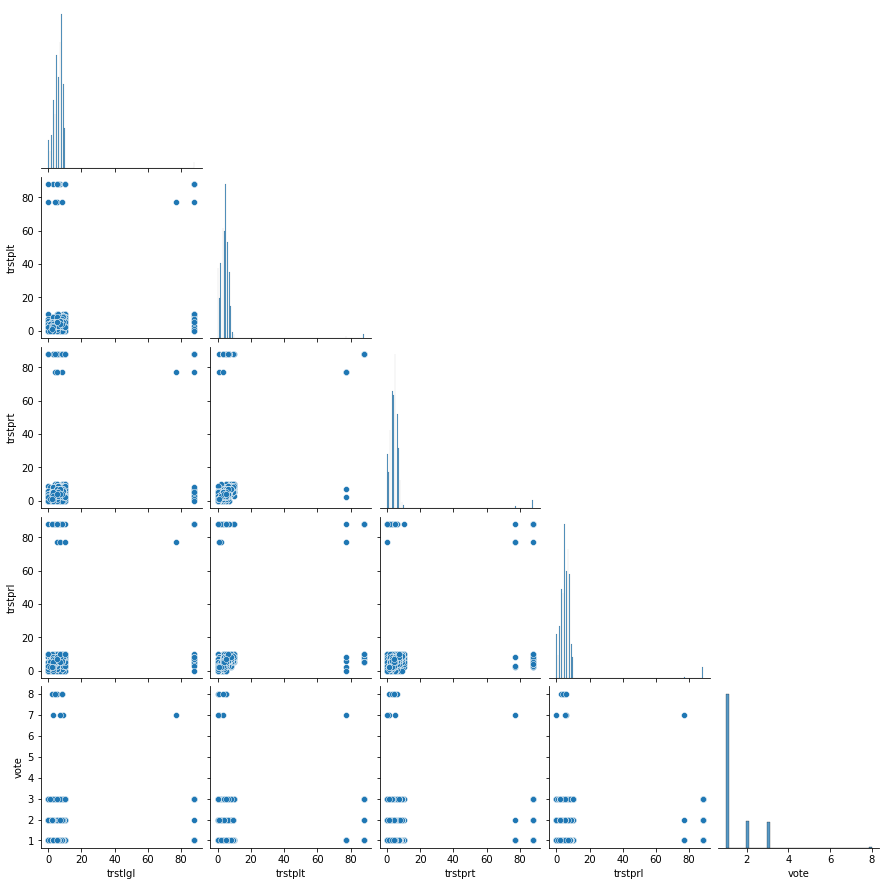

In [8]:
sns.pairplot(sub_data, corner = True)

In [2]:
data_de = pd.read_csv('ESS_R8_Germany.csv')

In [3]:
data_de.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,impdiff,ipfrule,ipgdtim,impfree,iphlppl,ipadvnt,ipbhprp,impenv,imptrad,impfun
0,ESS8e02_2,8,2.2,10.12.2020,10000004,DE,1.237005,1.047283,2.499809,2.618008,...,2,3,2,2,2,6,3,2,2,2
1,ESS8e02_2,8,2.2,10.12.2020,10000006,DE,1.237005,1.096930,2.499809,2.742116,...,2,4,2,1,1,5,4,1,5,5
2,ESS8e02_2,8,2.2,10.12.2020,10000012,DE,1.237005,0.621738,2.499809,1.554227,...,2,4,2,2,2,2,4,2,3,3
3,ESS8e02_2,8,2.2,10.12.2020,10000017,DE,1.237005,1.213660,2.499809,3.033918,...,4,2,2,3,1,5,3,1,2,4
4,ESS8e02_2,8,2.2,10.12.2020,10000019,DE,1.237005,0.621738,2.499809,1.554227,...,4,3,3,2,1,5,3,2,3,5


In [4]:
df_relevant = data_de[['idno','stfeco','emplrel','hincsrca','hinctnta','ppltrst','pplhlp',
                     'stflife','happy','health','rlgblg','smdfslv','gndr','agea',
                     'eduyrs','region','sbstrec', 'rlgdgr','ipeqopt',
                     'sbprvpv','sbeqsoc','sblazy','basinc']].copy()

In [5]:
df_relevant.head()

,idno,stfeco,emplrel,hincsrca,hinctnta,ppltrst,pplhlp,stflife,happy,health,...,agea,eduyrs,region,sbstrec,rlgdgr,ipeqopt,sbprvpv,sbeqsoc,sblazy,basinc
0,10000004,6,1,1,6,8,8,9,10,2,...,22,12,DEF,5,1,2,4,4,4,3
1,10000006,9,1,1,77,8,7,9,9,2,...,58,10,DEF,3,6,1,2,3,3,3
2,10000012,7,1,1,4,5,7,9,8,3,...,64,12,DEF,3,8,2,2,3,3,2
3,10000017,8,1,1,77,7,8,9,9,2,...,52,10,DEF,1,6,1,1,1,4,2
4,10000019,7,1,1,10,6,7,8,8,3,...,67,19,DEF,4,5,2,1,4,3,1


In [6]:
#Dropping No answers in UBI

no_answer = [7,8,9]

df_relevant = df_relevant[data_de.basinc.isin(no_answer)==False]

In [7]:
df_relevant['basinc']

0       3
1       3
2       2
3       2
4       1
       ..
2847    3
2848    3
2849    3
2850    3
2851    3
Name: basinc, Length: 2765, dtype: int64

In [8]:
# Making the answer binominal


df_relevant.loc[(df_relevant.basinc == 1),'basinc'] = 0
df_relevant.loc[(df_relevant.basinc == 2),'basinc'] = 0
df_relevant.loc[(df_relevant.basinc == 3),'basinc'] = 1
df_relevant.loc[(df_relevant.basinc == 4),'basinc'] = 1

df_relevant['basinc'].head(25)

0     1
1     1
2     0
3     0
4     0
5     1
6     1
7     1
8     0
9     1
10    0
11    1
12    0
13    0
14    0
15    1
16    0
17    0
19    1
20    1
21    0
22    1
23    1
24    0
25    0
Name: basinc, dtype: int64

In [9]:
df_relevant['basinc'].describe()

count    2765.000000
mean        0.474503
std         0.499440
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: basinc, dtype: float64

In [10]:
data_de['basinc'].describe()

count    2852.000000
mean        2.610799
std         1.238909
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: basinc, dtype: float64

In [15]:
df_relevant['ppltrst'].head()

0    8
1    8
2    5
3    7
4    6
Name: ppltrst, dtype: int64

In [13]:
no_answer2 = [77,88,99]

df_relevant = df_relevant[data_de.ppltrst.isin(no_answer2)==False]

<ipython-input-13-b767830ed9f3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_relevant = df_relevant[data_de.ppltrst.isin(no_answer2)==False]


In [16]:
df_relevant['ppltrst'].describe()

count    2761.000000
mean        5.291199
std         2.215875
min         0.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: ppltrst, dtype: float64

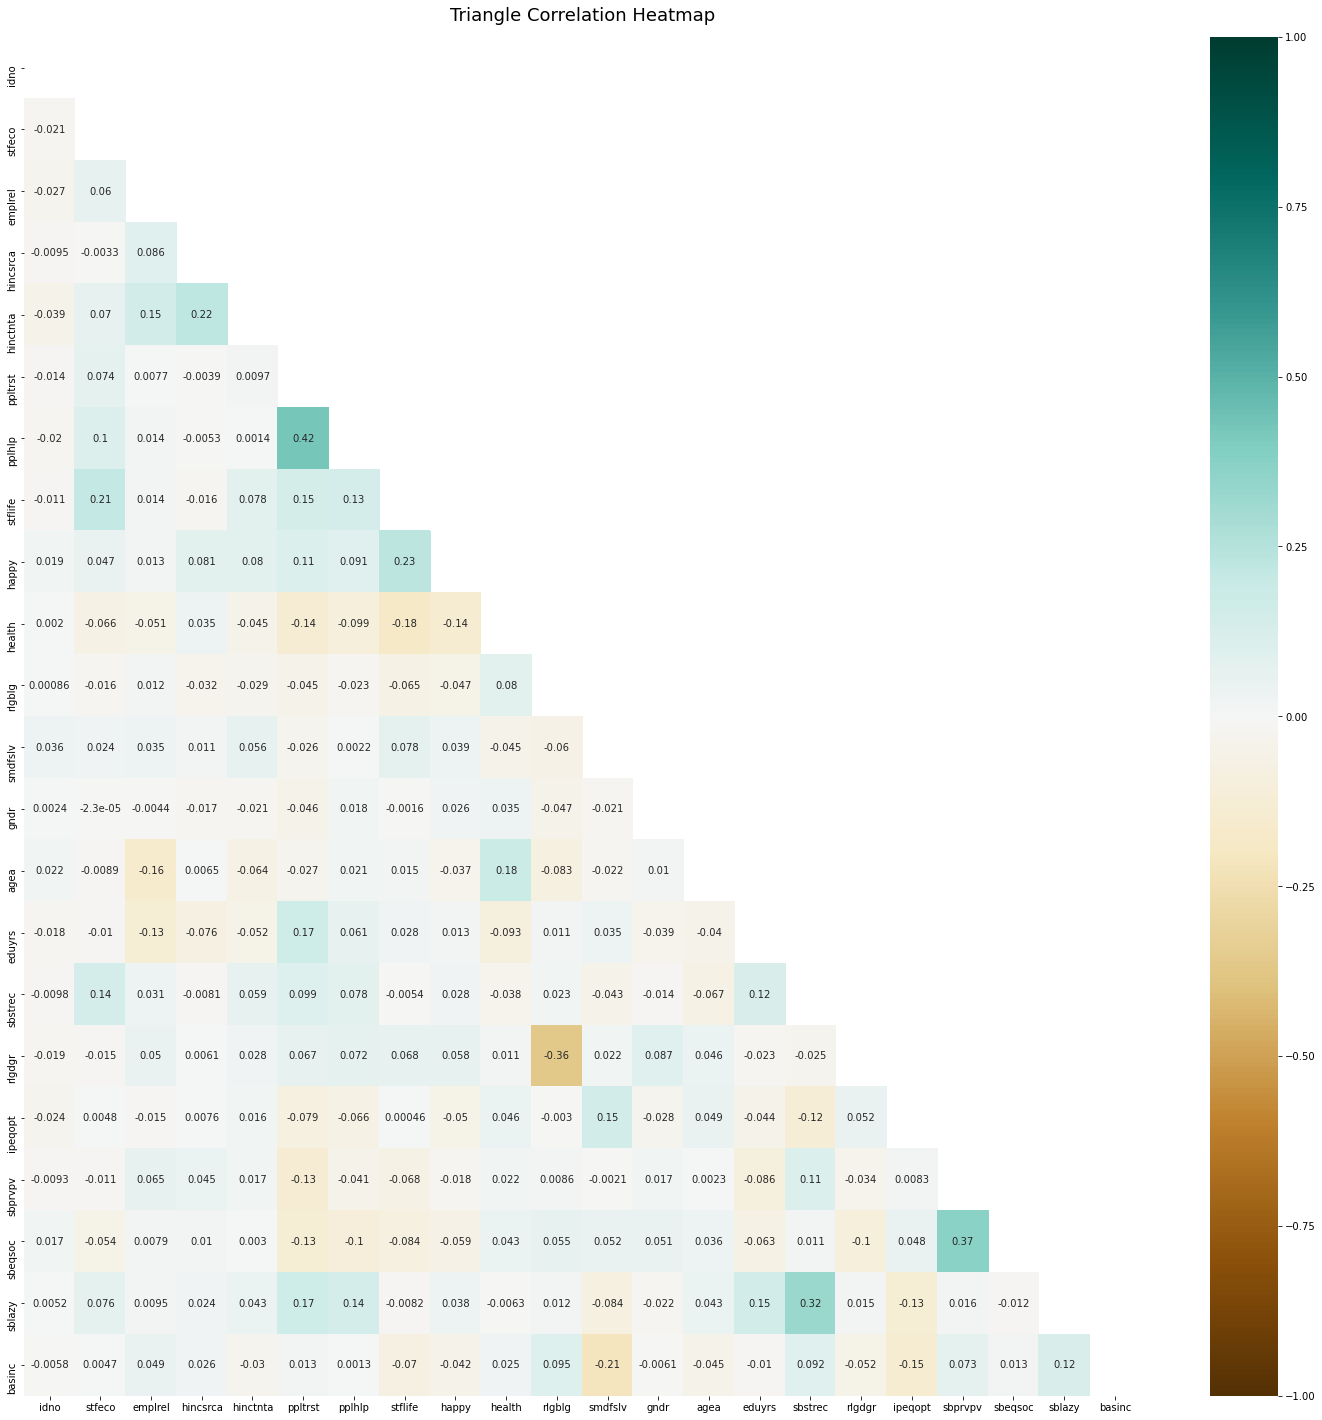

In [27]:
plt.figure(figsize = (25,25))


mask = np.triu(np.ones_like(df_relevant.corr(), dtype=np.bool))

heatmap_corr = sns.heatmap(df_relevant.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap_corr.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);



In [30]:
y = df_relevant['basinc']

x = df_relevant.drop(df_relevant.basinc)


In [31]:
from sklearn.linear_model import LinearRegression


In [33]:
df_relevant.head()

,idno,stfeco,emplrel,hincsrca,hinctnta,ppltrst,pplhlp,stflife,happy,health,...,agea,eduyrs,region,sbstrec,rlgdgr,ipeqopt,sbprvpv,sbeqsoc,sblazy,basinc
0,10000004,6,1,1,6,8,8,9,10,2,...,22,12,DEF,5,1,2,4,4,4,1
1,10000006,9,1,1,77,8,7,9,9,2,...,58,10,DEF,3,6,1,2,3,3,1
2,10000012,7,1,1,4,5,7,9,8,3,...,64,12,DEF,3,8,2,2,3,3,0
3,10000017,8,1,1,77,7,8,9,9,2,...,52,10,DEF,1,6,1,1,1,4,0
4,10000019,7,1,1,10,6,7,8,8,3,...,67,19,DEF,4,5,2,1,4,3,0


In [42]:
df_relevant = df_relevant[data_de.ppltrst.isin([8,7])==False]

<ipython-input-42-62750d5924f5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_relevant = df_relevant[data_de.ppltrst.isin([8,7])==False]


In [43]:
df_relevant.head()

,idno,stfeco,emplrel,hincsrca,hinctnta,ppltrst,pplhlp,stflife,happy,health,...,agea,eduyrs,region,sbstrec,rlgdgr,ipeqopt,sbprvpv,sbeqsoc,sblazy,basinc
4,10000019,7,1,1,10,6,7,8,8,3,...,67,19,DEF,4,5,2,1,4,3,0
5,10000020,9,2,4,3,0,3,10,0,5,...,73,8,DEF,5,0,6,5,5,2,1
6,10000026,4,1,1,8,3,6,6,7,4,...,34,17,DEF,2,3,2,2,2,2,1
9,10000032,8,1,5,77,6,7,7,7,2,...,30,8,DEF,5,2,1,2,2,2,1
10,10000036,8,1,1,77,3,5,8,9,2,...,41,14,DEF,4,9,1,2,2,3,0
